# Machine Learning Linear Regression Model
****************
1. Load training data and split data into X and Y matrices. X is our dependent or output variable. Y is a matrix of independent variables. Add a column of 1s to the beginning of Y matrix for matrix manipulation
2. Compute optimal weight vector with equation  $$\textbf{w} = [X^TX]^{-1}[X^TY]$$ Then report the learned weight vector.
3. Apply learning weight vector $\textbf{w}$ to training and testing datasets and report the sum of squared errors (SSE) which is given by the equation
$$ SSE = \frac{1}{2}(X \textbf{w} - Y)^T (X \textbf{w} - Y) $$
4. Consider a linear regression equation variant
$$ SSE = \frac{1}{2} \sum_{i=1}^N ((y^i - \textbf{w}^T \textbf{x}^i)^2 + \lambda ||\textbf{w}||_2^2) $$
Note that the first term is the regular SSE and the second term is a regularization term which computes the L2-norm of the weight vector $\textbf{w}$. This optimal weight vector is computed by
$$\textbf{w} = (X^TX + \lambda I)^{-1}X^TY $$
where $I$ is the identity matrix the same size as $X^tX$ and $\lambda$ is a user-specified parameter for learning. Use different values of $\lambda$ to compute different values of SSE for the training and testing datasets. Plot SSE values as a function of $\lambda$. 

In [99]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [215]:
#DataFrame of training txt file
df_train = pd.read_csv('housing_train.txt', delim_whitespace = True, index_col = False, header = None, 
                         names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

r1,c1 = df_train.shape #generalize the number of rows and columns
i_col1 = pd.DataFrame(np.full((r1,1),1)) #identity vector for y-intercept of linear regression
df_train = pd.concat([df_train, i_col1], axis=1) #add identity vector to our training matrix

cols1 = df_train.columns.tolist() 
cols1 = cols1[-1:] + cols1[:-1] #rearrange columns order so identity vector is in correct spot for matrix manipulation
df_train = df_train[cols1] #put columns back in a dataframe
df_train.rename(columns = {df_train.columns[0]:'iden'}, inplace = True) #rename identity column

print("Training Dataset:")
df_train

Training Dataset:


,iden,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
429,1,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
430,1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
431,1,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [216]:
#DataFrame of testing txt file
df_test = pd.read_csv('housing_test.txt', delim_whitespace = True, index_col = False, header = None, 
                         names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

r2,c2 = df_test.shape #generalize the number of rows and columns
i_col2 = pd.DataFrame(np.full((r2,1),1)) #identity vector for y-intercept of linear regression
df_test = pd.concat([df_test, i_col2], axis=1) #add identity vector to our testing matrix

cols2 = df_test.columns.tolist() 
cols2 = cols2[-1:] + cols2[:-1] #rearrange columns order so identity vector is in correct spot for matrix manipulation
df_test = df_test[cols2] #put columns back in a dataframe
df_test.rename(columns = {df_test.columns[0]:'iden'}, inplace = True) #rename identity column

print("Testing Dataset")
df_test

Testing Dataset


,iden,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
1,1,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
2,1,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
3,1,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
4,1,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
70,1,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
71,1,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391.0,19.2,396.90,12.01,21.8
72,1,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,24.5


Boston house price training dataset key:
*************
Variables in order:
* CRIM --     per capita crime rate by town
* ZN --       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS --    proportion of non-retail business acres per town
* CHAS --     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX --      nitric oxides concentration (parts per 10 million)
* RM --       average number of rooms per dwelling
* AGE --      proportion of owner-occupied units built prior to 1940
* DIS --      weighted distances to five Boston employment centres
* RAD --      index of accessibility to radial highways
* TAX --      full-value property-tax rate per \$10,000
* PTRATIO --  pupil-teacher ratio by town
* B --        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT --    \% lower status of the population
* MEDV --     Median value of owner-occupied homes in \$1000's

In [217]:
#split Pandas training dataframe into dependent and independent matrices

dfs1 = np.split(df_train, [-1], axis=1)
X1 = dfs1[0]
Y1 = dfs1[1]

X1 = X1.to_numpy()
Y1 = Y1.to_numpy()

print("independent matrix shape: ", X1.shape, "\ndependent matrix shape: ", Y1.shape)

independent matrix shape:  (433, 14) 
dependent matrix shape:  (433, 1)


In [218]:
#split Pandas testing dataframe into dependent and independent matrices

dfs2 = np.split(df_test, [-1], axis=1)
X2 = dfs2[0]
Y2 = dfs2[1]

X2 = X2.to_numpy()
Y2 = Y2.to_numpy()

print("independent matrix shape: ", X2.shape, "\ndependent matrix shape: ", Y2.shape)

independent matrix shape:  (74, 14) 
dependent matrix shape:  (74, 1)


In [219]:
def optimalWeight(X,Y):
    X_trans = np.transpose(X) #X matrix transpose
    a = np.linalg.inv(np.matmul(X_trans, X)) #inverse of (X * X_trans)
    b = np.matmul(X_trans, Y) 
    w = np.matmul(a,b) #optimal weight vector
    return w

w = optimalWeight(X,Y)
w

array([[ 3.95843212e+01],
       [-1.01137046e-01],
       [ 4.58935299e-02],
       [-2.73038670e-03],
       [ 3.07201340e+00],
       [-1.72254072e+01],
       [ 3.71125235e+00],
       [ 7.15862492e-03],
       [-1.59900210e+00],
       [ 3.73623375e-01],
       [-1.57564197e-02],
       [-1.02417703e+00],
       [ 9.69321451e-03],
       [-5.85969273e-01]])

In [220]:
def SSE(X,Y,w):
    a = np.transpose(np.matmul(X,w) - Y)
    b = np.matmul(X,w) - Y
    E = (1/2)* np.matmul(a,b) #sum of squared errors
    return E

E_training = SSE(X1,Y1,w) 
E_testing = SSE(X2,Y2,w)
print("SSE for training dataset = ", E_training, "\nSSE for testing dataset = ", E_testing)

SSE for training dataset =  [[4780.59564499]] 
SSE for testing dataset =  [[837.61548297]]


In [221]:
def optimalWeightVariant(X,Y,I,k):
    X_trans = np.transpose(X)
    a = np.matmul(X_trans, X) #a,b,c,d are components of equation to compute the variant optimal weight matrix
    b = k*I
    c = np.linalg.inv(a+b)
    d = np.matmul(X_trans, Y)
    w = np.matmul(c,d) #variant optimal weight matrix
    return w

#def SSEvariant(X,Y,w,k): #function for computing the SSE of the variant SSE function
#    a = np.transpose(np.matmul(X,w) - Y)
#    b = np.matmul(X,w) - Y
#    c = np.matmul(a,b)
#    magnitude = np.linalg.norm(w)
#    d = k*(magnitude)**2
#    output = (1/2)*(c + d)
#    return output

In [222]:
#find shape of identity matrix for variant SSE in training dataset
X1_trans = np.transpose(X1)
XtX1 = np.matmul(X1_trans,X1)
I1 = np.ones(XtX1.shape) 

#find shape of identity matrix for variant SSE in testing dataset
X2_trans = np.transpose(X2)
XtX2 = np.matmul(X2_trans,X2)
I2 = np.ones(XtX2.shape)

k = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5] #lambda values

#Make a list of variant w vectors and SSE values for the training and testing datasets for different values of w computed from optimalWeightVariant()
wtrain_values = []
wtest_values = []
SSEtrain_values = []
SSEtest_values = []

for i in k: #variant w vectors for training dataset
    w = optimalWeightVariant(X1,Y1,I1,i)
    wtrain_values.append(w)
    
for i in k: #variant w vectors for testing dataset
    w = optimalWeightVariant(X2,Y2,I2,i)
    wtest_values.append(w)
    
for i in wtrain_values: #different variant SSE values for training dataset
    E = float(SSE(X1,Y1,i))
    SSEtrain_values.append(E)
    
for i in wtest_values: #different variant SSE values for testing dataset
    E = float(SSE(X2,Y2,i))
    SSEtest_values.append(E)

As Lambda values increase, SSE values increase logarithmically. Smaller values of Lambda yield a smaller standard squared error reult.


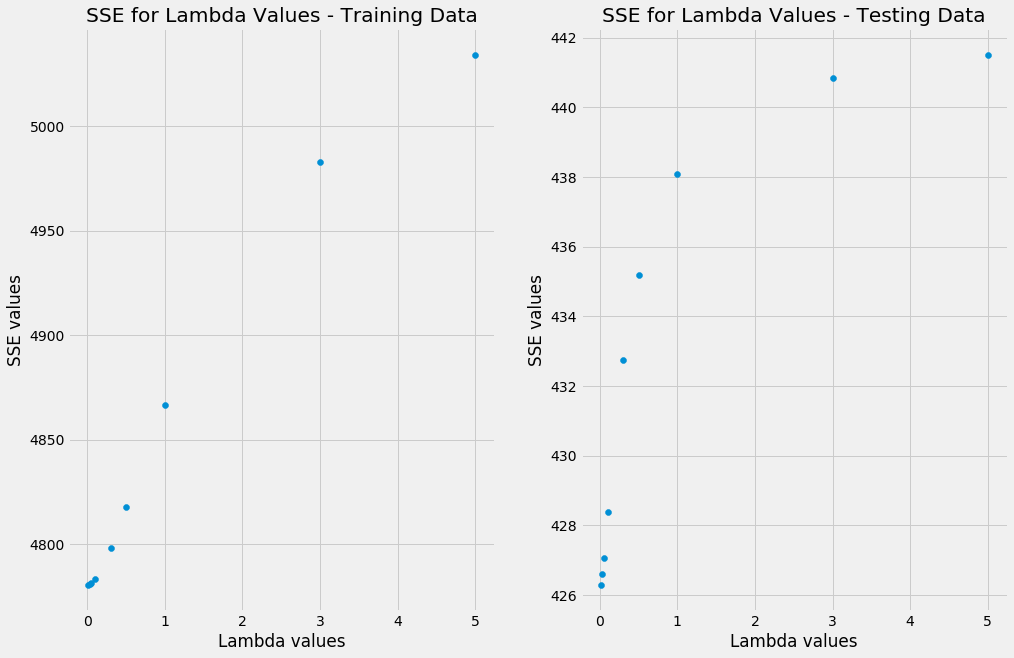

In [223]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1) #SSE for Lambda values of training dataset
ax2 = fig.add_subplot(1,2,2) #SSE for Lambda values of testing dataset

ax1.scatter(k, SSEtrain_values)
ax1.set_title("SSE for Lambda Values - Training Data")
ax1.set_xlabel("Lambda values")
ax1.set_ylabel("SSE values")

ax2.scatter(k, SSEtest_values)
ax2.set_title("SSE for Lambda Values - Testing Data")
ax2.set_xlabel("Lambda values")
ax2.set_ylabel("SSE values")

print("As Lambda values increase, SSE values increase logarithmically. Smaller values of Lambda yield a smaller standard squared error reult.")

In [227]:
#format wtrain_values and wtest_values to make new dataframe
wtrain = []
for i in wtrain_values:
    t = i.tolist()
    wtrain.append(t)
wtrain = pd.DataFrame(wtrain)

wtest = []
for i in wtest_values:
    t = i.tolist()
    wtest.append(t)
wtest = pd.DataFrame(wtest)

lam = pd.DataFrame(k)
lam_w_dftrain = pd.concat([lam,wtrain],axis=1)
lam_w_dftest = pd.concat([lam,wtest],axis=1)

lam_w_dftrain.columns = [r'$\lambda$','y-intercept', 'CRIM co', 'ZN co', 'INDUS co', 'CHAS co', 'NOX co', 'RM co', 'AGE co', 'DIS co', 'RAD co', 'TAX co', 'TPRATIO co', 'B co', 'LSTAT co']
lam_w_dftrain.set_index(r'$\lambda$', inplace=True)

lam_w_dftest.columns = [r'$\lambda$','y-intercept', 'CRIM co', 'ZN co', 'INDUS co', 'CHAS co', 'NOX co', 'RM co', 'AGE co', 'DIS co', 'RAD co', 'TAX co', 'TPRATIO co', 'B co', 'LSTAT co']
lam_w_dftest.set_index(r'$\lambda$', inplace=True)

print("Relationship between different Lambda values and variant weight vector in our training dataset.")
lam_w_dftrain

Relationship between different Lambda values and variant weight vector in our training dataset.


,y-intercept,CRIM co,ZN co,INDUS co,CHAS co,NOX co,RM co,AGE co,DIS co,RAD co,TAX co,TPRATIO co,B co,LSTAT co
$\lambda$,,,,,,,,,,,,,,
0.01,[39.39487098497102],[-0.10117843501033608],[0.04589494072053313],[-0.0020329753383183657],[3.065539752001442],[-17.288640553483674],[3.7272949831915696],[0.0072653783263398886],[-1.5976226788204002],[0.37224337740737923],[-0.01568276086470677],[-1.0210921320557986],[0.0097410047879406],[-0.5849281745297059]
0.03,[39.02609746737562],[-0.1012589998025446],[0.045897686899528445],[-0.0006754323204223311],[3.052938496890931],[-17.41172719412407],[3.7585226913409713],[0.007473178696771887],[-1.5949375677354425],[0.3695571492107508],[-0.0155393805880224],[-1.0150872382226623],[0.009834030752717493],[-0.5829016287741018]
0.05,[38.67023559965219],[-0.10133674382709024],[0.045900336928165864],[0.0006345798436928618],[3.0407784420973343],[-17.530504274734994],[3.7886570421447345],[0.007673703475277516],[-1.592346468862715],[0.3669649723392059],[-0.015401020400482857],[-1.0092925901993226],[0.00992379965420298],[-0.5809460372709836]
0.10,[37.832805946508415],[-0.10151969445330544],[0.04590657309105417],[0.0037173575493234523],[3.012162871309286],[-17.810015676289368],[3.859570509503442],[0.008145587121504705],[-1.5862489820930108],[0.3608649487758431],[-0.015075425178387114],[-0.9956563719792939],[0.010135047744691317],[-0.5763440541346201]
0.30,[35.08449379643753],[-0.10212010957706086],[0.04592703919486407],[0.013834548161232973],[2.918251077549016],[-18.727328047734773],[4.092297334039657],[0.009694234883805275],[-1.5662379914252682],[0.34084563275061974],[-0.014006872970380613],[-0.9509044527291906],[0.010828330686839416],[-0.5612410707129252]
0.50,[33.02651632215293],[-0.10256970945238297],[0.04594236452122846],[0.021410452660218127],[2.847928513889528],[-19.414225348400578],[4.266566680606587],[0.010853885620813242],[-1.5512534606354933],[0.3258548678081574],[-0.01320672500535025],[-0.917393542498246],[0.011347471381320196],[-0.5499317295686081]
1.00,[29.602740203489702],[-0.10331769106794242],[0.045967860663464144],[0.03401418677517576],[2.7309356327356653],[-20.556989350136064],[4.55649173296824],[0.012783150906261032],[-1.526324286575914],[0.300915322233978],[-0.011875550331035267],[-0.8616427601903922],[0.012211145320515648],[-0.5311168238606943]
3.00,[24.2737108557576],[-0.10448190737256835],[0.04600754482665348],[0.053631611122568756],[2.5488388847213628],[-22.335675424165856],[5.007753456612747],[0.015786008268860896],[-1.4875225964029681],[0.26209748903519703],[-0.009803607347455223],[-0.7748679405815722],[0.013555434085125273],[-0.5018318527593282]
5.00,[22.44345626485847],[-0.10488175734474714],[0.04602117434848729],[0.06036921353199176],[2.4862977750187554],[-22.9465649765134],[5.162739249991546],[0.016817339326540504],[-1.4741961598343778],[0.24876550814623144],[-0.009091998739151563],[-0.7450651375568214],[0.014017129925468774],[-0.4917739323942776]


In [228]:
print("Relationship between different Lambda values and variant weight vector in our testing dataset.")
lam_w_dftest

Relationship between different Lambda values and variant weight vector in our testing dataset.


,y-intercept,CRIM co,ZN co,INDUS co,CHAS co,NOX co,RM co,AGE co,DIS co,RAD co,TAX co,TPRATIO co,B co,LSTAT co
$\lambda$,,,,,,,,,,,,,,
0.01,[15.859473624206657],[-0.029030363302175566],[0.010714747747563536],[-0.15813152013036103],[1.1007353455720548],[-6.736814209630211],[4.506765218785006],[-0.07623111964478824],[-0.8458585999569266],[-0.026394085435505588],[0.0048306392024617395],[-0.6939656721364145],[0.009950187483251938],[-0.03216459224946]
0.03,[14.775720691201059],[-0.027786508683962374],[0.01188179680121415],[-0.1547207241064612],[1.0530826257166552],[-6.998800975646645],[4.624341991283643],[-0.07576637401291375],[-0.8465221128155207],[-0.028035048108112193],[0.004907064358864677],[-0.6828463839641472],[0.010146198616290375],[-0.02339762494284514]
0.05,[13.883760370873915],[-0.026762780000148645],[0.012842312261842181],[-0.15191353934973506],[1.0138630453296003],[-7.214423736693789],[4.721111109471195],[-0.07538387478267605],[-0.847068203279278],[-0.02938560832030035],[0.00496996449496212],[-0.6736948850036129],[0.010307521504271167],[-0.016182154766202217]
0.10,[12.21936084655863],[-0.024852500477988926],[0.014634635798513429],[-0.1466753276623436],[0.9406792394631509],[-7.616776187579944],[4.90168245397075],[-0.07467013054719462],[-0.8480872090438467],[-0.03190575604818946],[0.005087336259395503],[-0.6566181718700648],[0.010608550296585584],[-0.0027180747434520924]
0.30,[9.058209413727582],[-0.021224355456274324],[0.01803875003506583],[-0.13672652622436487],[0.8016831093856496],[-8.380953903343197],[5.244636988656708],[-0.07331453438192082],[-0.8500225806218396],[-0.036692208149723626],[0.005310257448626121],[-0.6241848075233349],[0.011180286580001399],[0.022853907964851317]
0.50,[7.767489844079591],[-0.019742959236937807],[0.01942867296523154],[-0.13266436312272845],[0.7449300467691415],[-8.692972847466535],[5.384667651160413],[-0.07276103527371092],[-0.8508128059623132],[-0.038646549005783015],[0.0054012776820990815],[-0.6109420448906349],[0.011413730382156345],[0.03329512193930295]
1.00,[6.461362099443704],[-0.018243878609160546],[0.020835188326824294],[-0.1285537072867271],[0.6874994852370833],[-9.008716568635919],[5.526369952498214],[-0.07220092867969896],[-0.8516124647480225],[-0.04062422012344058],[0.005493384484407837],[-0.5975411946226217],[0.011649960957716338],[0.04386097960575519]
3.00,[5.3493103516966585],[-0.016967544621910413],[0.02203271121254069],[-0.12505384900379823],[0.6386024637944416],[-9.277544298766315],[5.647016874290813],[-0.07172404767076301],[-0.8522933031672721],[-0.04230803139873984],[0.005571805244493966],[-0.5861315610530937],[0.011851090307800793],[0.05285686881509832]
5.00,[5.096645127504871],[-0.01667755342889521],[0.022304796022494244],[-0.12425865895994548],[0.6274927497856027],[-9.338623667483262],[5.674428621635599],[-0.07161569727491557],[-0.8524479939827998],[-0.04269060402105751],[0.005589622939546235],[-0.583539219797629],[0.011896788174322576],[0.054900792012525734]


As Lambda values increase, the y-intercept decreases. With the independent variable coefficients, some increase and some decrease with increasing Lambda values. The coefficients, or weight values, of greatest significance decrease with increasing $\lambda$ values. This is due to the SSE variant function. The only time $\lambda$ impacts the equation is when it is multiplied by the squared magnitude of the weight matrix. Because it is squared, it always yields a positive value. So if we are looking to minimize our SSE variant function, if the $\lambda$ value increases, the weight vector needs to decrease.